# Heart-Stroke Prediction

<img src="images.jpg" height=100px width=500px></img>

## Problem statement:

In this project, the main motive is to predict the threat of a heart-stroke in a person who qualifies some certain attributes like glucose level, smoking addiction and a couple more. Data science project of heart
stroke prediction using machine learning algorithms of Naïve Bayes , Decision tree classifier.
The dataset that has been used here, is taken from kaggle.

## Importing required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

## Reading CSV file:

In [2]:
data=pd.read_csv('train_2v.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head(100)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


## Visualization:

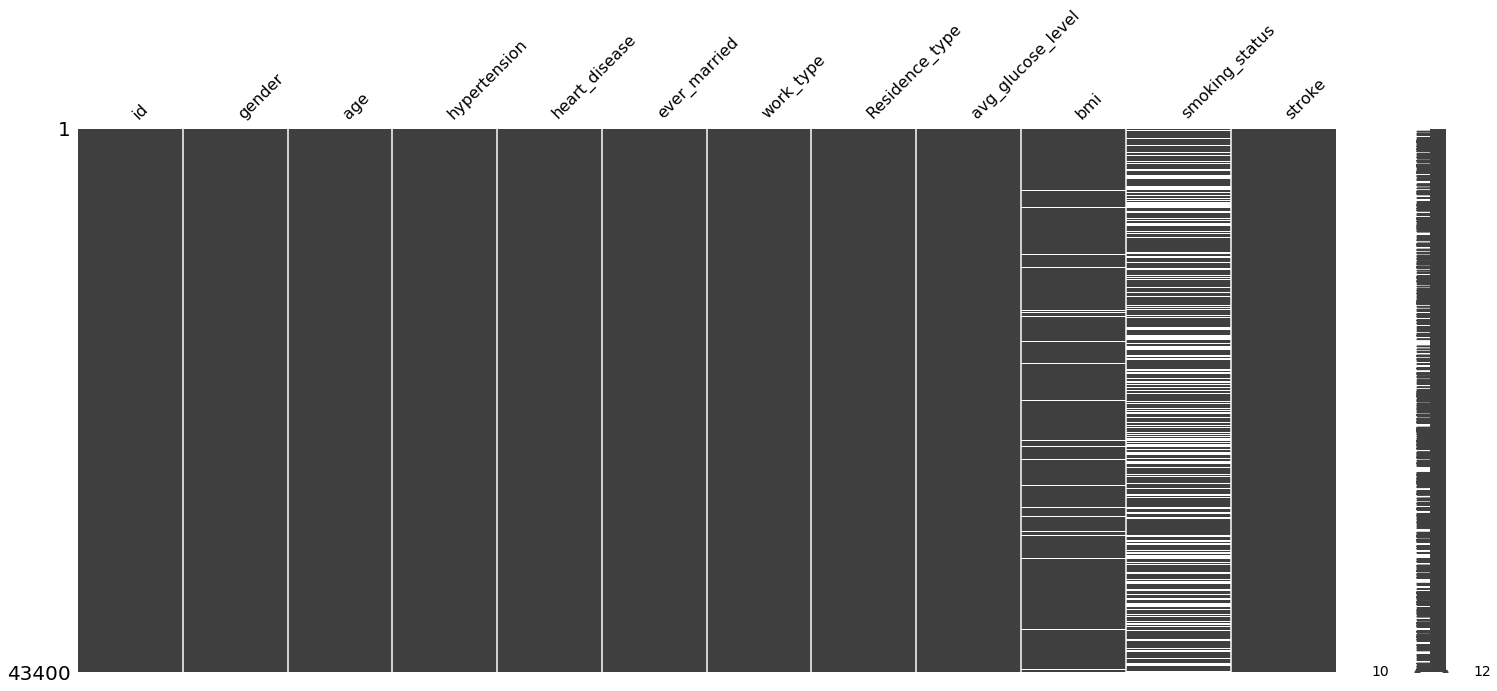

In [7]:
ms.matrix(data)

In [8]:
data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [77]:
ndata=data.dropna()
ndata.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [78]:
ndata

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked
5,9348,Female,66.0,1,0,Yes,Private,Urban,219.98,32.2,never smoked
7,60512,Male,46.0,0,0,Yes,Govt_job,Urban,120.80,32.5,never smoked
8,31309,Female,75.0,0,0,Yes,Self-employed,Rural,78.71,28.0,never smoked
9,39199,Male,75.0,0,0,Yes,Self-employed,Urban,77.20,25.7,smokes
12,19042,Female,47.0,0,0,Yes,Private,Rural,91.60,26.7,never smoked
14,33104,Female,67.0,0,0,Yes,Govt_job,Urban,236.60,24.2,never smoked
15,55264,Female,52.0,0,0,No,Self-employed,Urban,109.49,24.5,never smoked


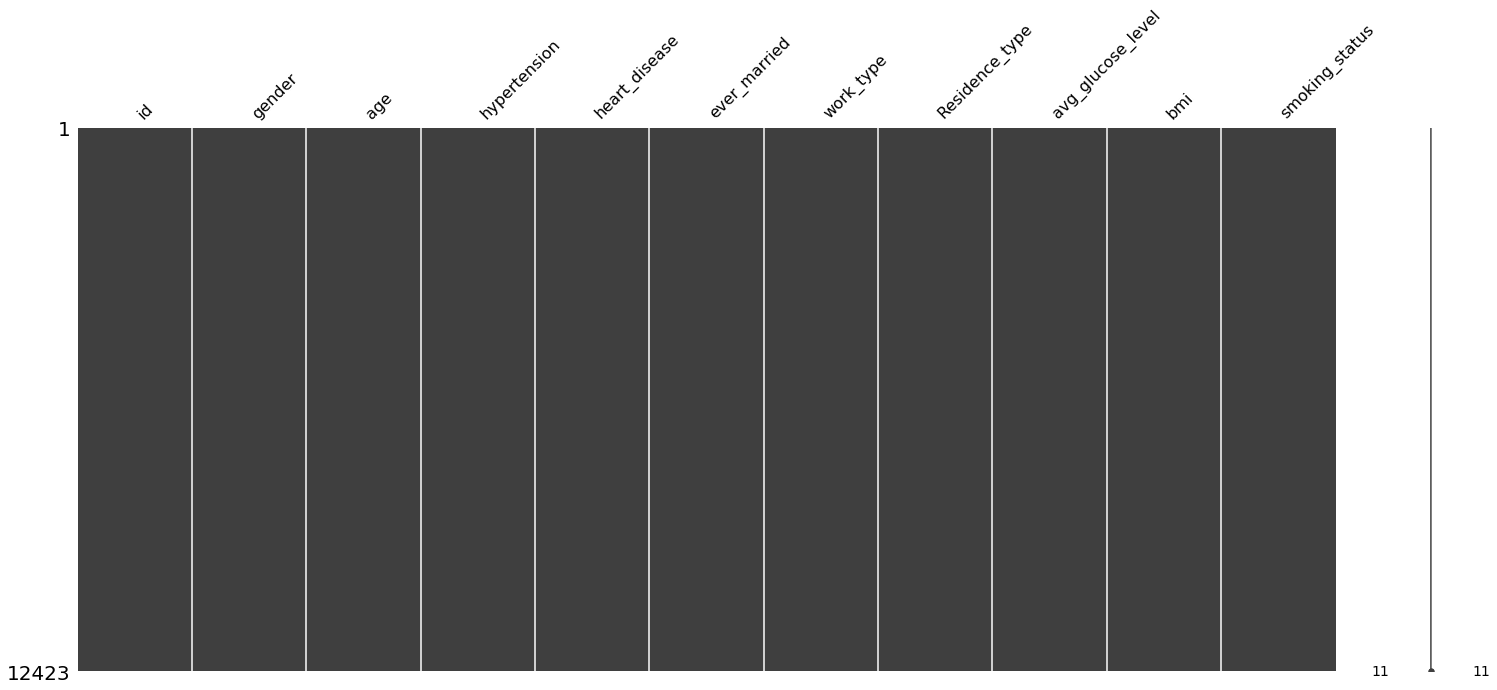

In [79]:
ms.matrix(ndata)

In [12]:
data=pd.read_csv('test_2v.csv')

In [13]:
type(data)

pandas.core.frame.DataFrame

In [14]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18601 entries, 0 to 18600
Data columns (total 11 columns):
id                   18601 non-null int64
gender               18601 non-null object
age                  18601 non-null float64
hypertension         18601 non-null int64
heart_disease        18601 non-null int64
ever_married         18601 non-null object
work_type            18601 non-null object
Residence_type       18601 non-null object
avg_glucose_level    18601 non-null float64
bmi                  18010 non-null float64
smoking_status       12850 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 1.6+ MB


In [16]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,18601.000000,18601.000000,18601.000000,18601.000000,18601.000000,18010.000000
mean,36747.368045,42.056504,0.093167,0.048062,104.386359,28.545325
std,21053.151124,22.528018,0.290674,0.213903,42.606714,7.757092
min,2.000000,0.080000,0.000000,0.000000,55.000000,10.200000
25%,18542.000000,24.000000,0.000000,0.000000,77.550000,23.300000
50%,36717.000000,43.000000,0.000000,0.000000,91.830000,27.700000
75%,55114.000000,60.000000,0.000000,0.000000,112.310000,32.800000
max,72942.000000,82.000000,1.000000,1.000000,275.720000,88.300000


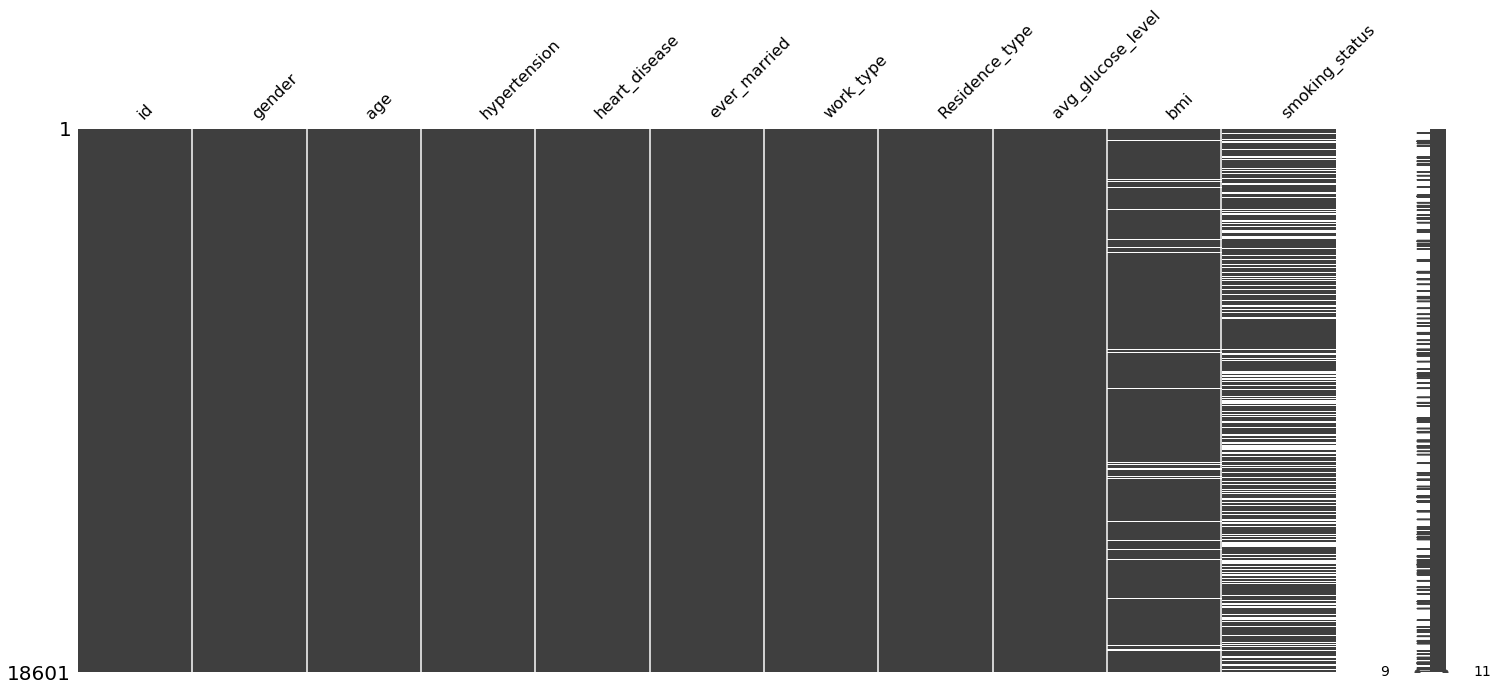

In [17]:
ms.matrix(data)

In [18]:
data.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

In [19]:
mdata=data.dropna()
mdata.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [20]:
mdata

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked
5,9348,Female,66.0,1,0,Yes,Private,Urban,219.98,32.2,never smoked
7,60512,Male,46.0,0,0,Yes,Govt_job,Urban,120.80,32.5,never smoked
8,31309,Female,75.0,0,0,Yes,Self-employed,Rural,78.71,28.0,never smoked
9,39199,Male,75.0,0,0,Yes,Self-employed,Urban,77.20,25.7,smokes
12,19042,Female,47.0,0,0,Yes,Private,Rural,91.60,26.7,never smoked
14,33104,Female,67.0,0,0,Yes,Govt_job,Urban,236.60,24.2,never smoked
15,55264,Female,52.0,0,0,No,Self-employed,Urban,109.49,24.5,never smoked


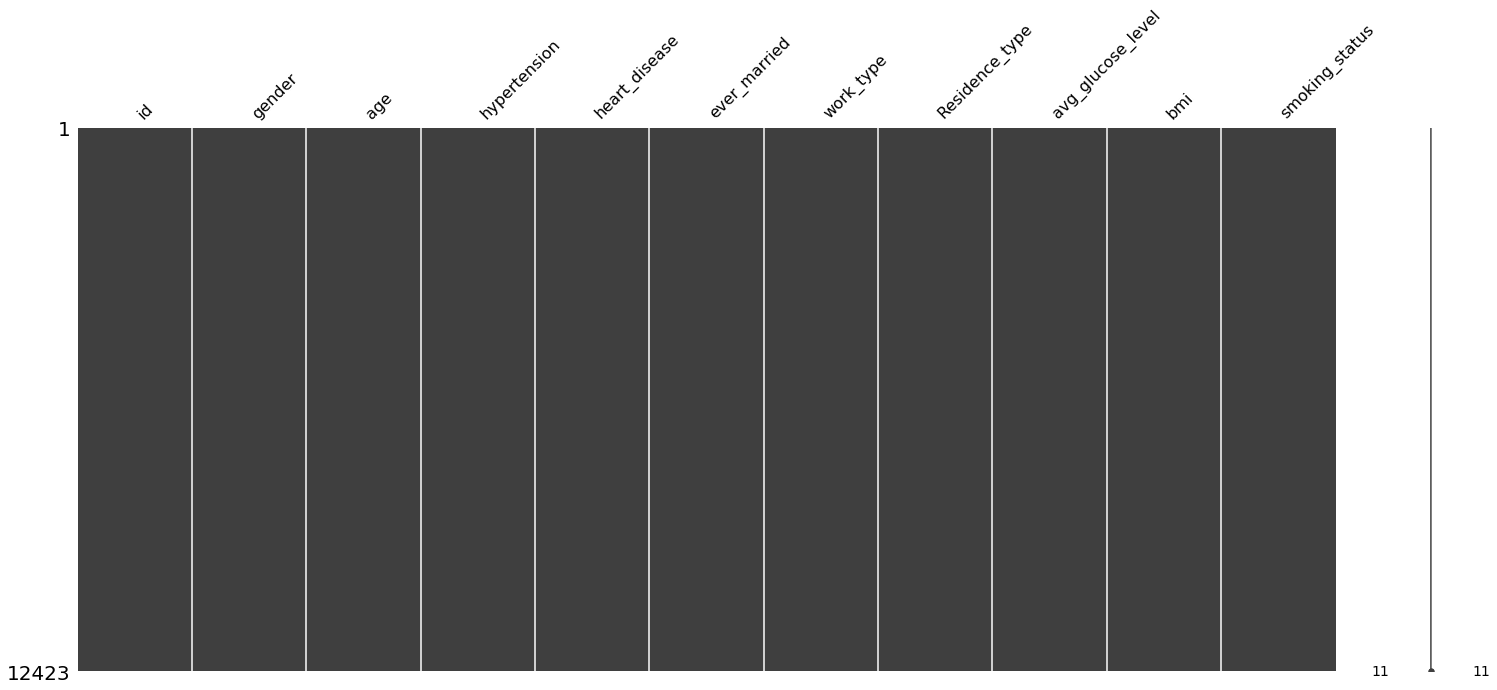

In [21]:
ms.matrix(mdata)

In [22]:
x=ndata.iloc[:,1]
print(x)

1          Male
3        Female
6        Female
7        Female
8        Female
9        Female
11         Male
12       Female
13       Female
14       Female
15         Male
16       Female
17       Female
18       Female
19       Female
21       Female
22       Female
23         Male
24       Female
25       Female
26       Female
27       Female
28       Female
29       Female
32         Male
36       Female
37       Female
40         Male
44         Male
46       Female
          ...  
43353    Female
43356    Female
43357    Female
43358      Male
43359    Female
43361      Male
43362      Male
43364      Male
43365      Male
43366      Male
43370      Male
43373    Female
43374      Male
43375    Female
43377    Female
43378      Male
43380      Male
43381      Male
43383      Male
43384    Female
43386      Male
43387      Male
43390    Female
43393      Male
43394      Male
43395    Female
43396    Female
43397    Female
43398      Male
43399    Female
Name: gender, Length: 29

In [23]:
l=[]
for i in x:
    if(i=="Male"):
        l.append('0')
    else:
        l.append('1')
print(pd.Series(l))

0        0
1        1
2        1
3        1
4        1
5        1
6        0
7        1
8        1
9        1
10       0
11       1
12       1
13       1
14       1
15       1
16       1
17       0
18       1
19       1
20       1
21       1
22       1
23       1
24       0
25       1
26       1
27       0
28       0
29       1
        ..
29042    1
29043    1
29044    1
29045    0
29046    1
29047    0
29048    0
29049    0
29050    0
29051    0
29052    0
29053    1
29054    0
29055    1
29056    1
29057    0
29058    0
29059    0
29060    0
29061    1
29062    0
29063    0
29064    1
29065    0
29066    0
29067    1
29068    1
29069    1
29070    0
29071    1
Length: 29072, dtype: object


## Training and testing

In [24]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(ndata["gender"])

LabelEncoder()

In [25]:
list(le.classes_)

['Female', 'Male', 'Other']

In [26]:
a=le.transform(ndata["gender"])
print(a)

[1 0 0 ... 0 1 0]


In [27]:
le.fit(ndata["smoking_status"])

LabelEncoder()

In [28]:
list(le.classes_)

['formerly smoked', 'never smoked', 'smokes']

In [29]:
b=le.transform(ndata["smoking_status"])
print(b)

[1 0 0 ... 0 1 1]


In [30]:
ndata["gender"]=pd.to_numeric(ndata["gender"],errors="coerce")
ndata["smoking_status"]=pd.to_numeric(ndata["smoking_status"],errors="coerce")

In [47]:
fdata=ndata[["age","hypertension","heart_disease","avg_glucose_level","bmi","smoking_status"]].copy()

In [48]:
odata=ndata[["stroke"]].copy()

In [49]:
print(fdata)

        age  hypertension  heart_disease  avg_glucose_level   bmi  \
1      58.0             1              0              87.96  39.2   
3      70.0             0              0              69.04  35.9   
6      52.0             0              0              77.59  17.7   
7      75.0             0              1             243.53  27.0   
8      32.0             0              0              77.67  32.3   
9      74.0             1              0             205.84  54.6   
11     79.0             0              1              57.08  22.0   
12     37.0             0              0             162.96  39.4   
13     37.0             0              0              73.50  26.1   
14     40.0             0              0              95.04  42.4   
15     35.0             0              0              85.37  33.0   
16     20.0             0              0              84.62  19.7   
17     42.0             0              0              82.67  22.5   
18     44.0             0         

In [50]:
print(odata)

       stroke
1           0
3           0
6           0
7           0
8           0
9           0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
32          0
36          0
37          0
40          0
44          0
46          0
...       ...
43353       0
43356       0
43357       0
43358       0
43359       0
43361       0
43362       0
43364       0
43365       0
43366       0
43370       0
43373       0
43374       0
43375       0
43377       0
43378       0
43380       0
43381       0
43383       0
43384       0
43386       0
43387       0
43390       0
43393       0
43394       0
43395       0
43396       0
43397       0
43398       0
43399       0

[29072 rows x 1 columns]


In [92]:
xtrain=features.drop(["heart_disease","id"],axis=1)


In [93]:
ytrain=features["heart_disease"]
ytrain.head()

0    0
1    1
4    0
5    0
7    0
Name: heart_disease, dtype: int64

In [84]:
from sklearn.preprocessing import LabelEncoder

In [90]:
label=LabelEncoder()
features=ndata.apply(label.fit_transform)
features.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,6048,1,70,0,0,1,2,1,2213,63,0
1,10484,0,64,0,1,1,3,0,5990,112,0
4,6816,0,53,0,0,1,0,0,2186,128,1
5,1466,0,56,1,0,1,2,1,6787,174,1
7,10244,1,36,0,0,1,0,1,4896,177,1


In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

## Model

In [60]:
from sklearn.naive_bayes import GaussianNB

In [95]:
model=GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [96]:
predict=model.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
test_score=model.score(x_test, y_test)
print("NBtest_score:", test_score)

NBtest_score: 0.8995492594977463


In [97]:
from sklearn.metrics import classification_report

In [100]:
nbreport=classification_report(y_test, predict)
print(nbreport)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2952
           1       0.17      0.25      0.20       154

    accuracy                           0.90      3106
   macro avg       0.56      0.59      0.57      3106
weighted avg       0.92      0.90      0.91      3106



In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dt_mod=DecisionTreeClassifier(criterion='entropy',max_depth=8)
dt_mod.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [103]:
y_predict=dt_mod.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
ts_dt_score=dt_mod.score(x_test, y_test)
print("Decision tree test score:", ts_dt_score)

Decision tree test score: 0.9475209272376046
